This notebook reproduces figure 3 of [our paper](https://arxiv.org/pdf/1910.12478.pdf).
The reader should have already run the notebooks [RNN.ipynb](RNN.ipynb), [GRU.ipynb](GRU.ipynb), [Transformer.ipynb](Transformer.ipynb), and [Batchnorm.ipynb](Batchnorm.ipynb), each of which produces a `.df` dataframe and a `.kernel` numpy serialized array.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
BN_df = pd.read_pickle('BN.df')
GRU_df = pd.read_pickle('GRU.df')
trsfmr_df = pd.read_pickle('transformer2layer.df')
simpleRNN_df = pd.read_pickle('RNN.df')

In [3]:
with open('RNN.kernel', 'rb') as f:
    RNN_ker = np.load(f)
with open('BN.kernel', 'rb') as f:
    BN_ker = np.load(f)
with open('GRU.kernel', 'rb') as f:
    GRU_ker = np.load(f)
with open('transformer2layer.kernel', 'rb') as f:
    trsfmr_ker = np.load(f)

In [4]:
BN_df['model'] = 'BN'

GRU_df['model'] = 'GRU'

trsfmr_df['model'] = 'transformer'

simpleRNN_df['model'] = 'simpleRNN'

In [5]:
frob_df = pd.concat([BN_df, GRU_df, trsfmr_df, simpleRNN_df])

frob_df['logrelfrob'] = np.log2(frob_df.relfrob)

frob_df['logwidth'] = np.log2(frob_df.width)

C:\Users\gregyang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
sent1 = "The brown fox jumps over the dog".split()
sent2 = "The quick brown fox jumps over the lazy dog".split()

In [7]:
covcmap = 'PuBu_r'
corcmap = 'viridis'

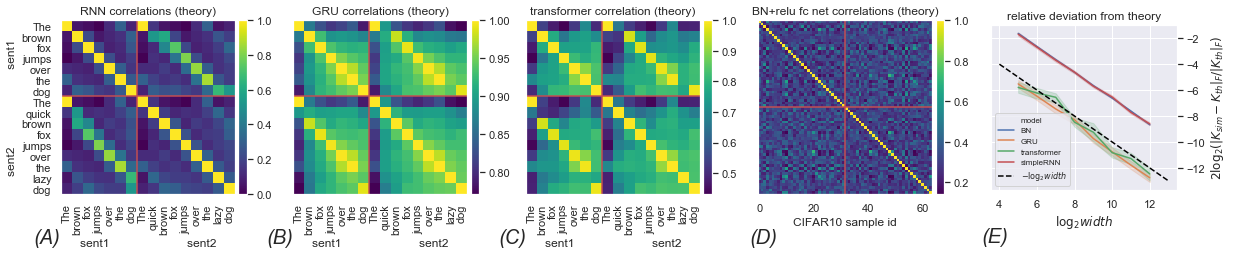

In [9]:
from utils import getCor, colorbar

plt.figure(figsize=(20, 4))

plt.subplot(151)
ax = plt.gca()
im2 = plt.imshow(getCor(RNN_ker), cmap=corcmap)
span = np.linspace(-.5, 15.5)
plt.plot(span, [6.5]*len(span), 'r')
plt.plot([6.5]*len(span), span, 'r')
plt.yticks(np.arange(16), sent1+sent2)
plt.yticks(np.arange(16), sent1+sent2)
plt.xticks(np.arange(16), sent1+sent2, rotation=90)
plt.title('RNN correlations (theory)')
plt.xlabel('sent1                       sent2')
plt.ylabel('sent2                       sent1')
plt.text(-3, 20, '(A)',  style='italic', fontsize=20)
plt.grid()
colorbar(im2)

plt.subplot(152)
ax = plt.gca()
im3 = plt.imshow(getCor(GRU_ker), cmap=corcmap)
plt.plot(span, [6.5]*len(span), 'r')
plt.plot([6.5]*len(span), span, 'r')
plt.yticks([])
plt.xticks(np.arange(16), sent1+sent2, rotation=90)
plt.title('GRU correlations (theory)')
plt.xlabel('sent1                       sent2')
plt.text(-3, 20, '(B)',  style='italic', fontsize=20)
plt.grid()
colorbar(im3)

ax = plt.subplot(153)
im4 = plt.imshow(getCor(trsfmr_ker), cmap=corcmap)
span = np.linspace(-.5, 15.5)
plt.plot(span, [6.5]*len(span), 'r')
plt.plot([6.5]*len(span), span, 'r')
plt.yticks([])
plt.xticks(np.arange(16), sent1+sent2, rotation=90)
plt.title('transformer correlation (theory)')
plt.xlabel('sent1                       sent2')
plt.text(-3, 20, '(C)',  style='italic', fontsize=20)
plt.grid()
colorbar(im4)


ax = plt.subplot(154)
ax = plt.gca()
im1 = plt.imshow(getCor(BN_ker), cmap=corcmap)
plt.yticks([])
span = np.linspace(-.5, 63.5)
plt.plot(span, [31.5]*len(span), 'r')
plt.plot([31.5]*len(span), span, 'r')
plt.title('BN+relu fc net correlations (theory)')
plt.xlabel('CIFAR10 sample id')
plt.text(-0.05, -.282, '(D)',  style='italic', fontsize=20,
         transform=ax.axes.transAxes)
plt.grid()
colorbar(im1)

ax = plt.subplot(155)
sns.lineplot(x='logwidth', y='logrelfrob', hue='model', data=frob_df)
plt.plot(np.linspace(4, 13), -np.linspace(4, 13), '--', c='black', label=r'$-\log_2 width$')
plt.legend(loc='lower left', fontsize=8)
plt.ylabel(r'$2\log_2(\|K_{sim} - K_{th}\|_F / \|K_{th}\|_F)$')
plt.xlabel(r'$\log_2 width$')
ax.yaxis.set_label_position('right')
ax.yaxis.set_ticks_position('right')
ax.set_aspect(.69)

plt.text(-0.05, -.32, '(E)',  style='italic', fontsize=20,
         transform=ax.axes.transAxes
        )
plt.title('relative deviation from theory')

plt.subplots_adjust(wspace=.25)
plt.savefig('allkernels.pdf', bbox_inches='tight')